<a href="https://colab.research.google.com/github/DavideScassola/data_analysis_laboratory/blob/main/notebooks/efficientamento_energetico2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Abbiamo trovato [qui](https://search.r-project.org/CRAN/refmans/MPV/html/gasdata.html) dei dati riguardo al consumo di gas una casa, la cui descrizione è la seguente:

"Questo data frame contiene il consumo medio mensile di gas naturale utilizzato dalla caldaia di una casa di 1600 piedi quadrati (~150 metri quadrati) situata a London, Ontario, per ciascun mese dal 2006 al 2011. Include inoltre la temperatura media mensile e una misura della temperatura giornaliera. Nel corso del periodo considerato sono stati effettuati tre interventi:

  * in una prima occasione è stato aggiunto l’isolamento del tetto;

  * in una seconda occasione sono state isolate le pareti;

  * in una terza occasione la caldaia a media efficienza è stata sostituita con una caldaia ad alta efficienza."

Il nostro obiettivo è studiare, a partire dai dati raccolti, se gli interventi di efficientamento sono stati utili al fine di risparmiare gas.

In [2]:
# Importiamo le librerie necessarie
import pandas as pd
import matplotlib.pyplot as plt

1. Scarichiamo i dati e li mettiamo in un DataFrame:

In [3]:
LINK_DATI = 'https://raw.githubusercontent.com/DavideScassola/data_analysis_laboratory/main/notebooks/dati/gasdata.csv'
df = pd.read_csv(LINK_DATI)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   month                    70 non-null     object 
 1   cubicmetres              70 non-null     float64
 2   dailyusage               70 non-null     float64
 3   temp                     70 non-null     float64
 4   year                     70 non-null     int64  
 5   roof_insulation          70 non-null     int64  
 6   wall_insulation          70 non-null     int64  
 7   high_efficiency_furnace  70 non-null     int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 4.5+ KB


In [5]:
df.head(n=10)

,month,cubicmetres,dailyusage,temp,year,roof_insulation,wall_insulation,high_efficiency_furnace
0,July,27.9,0.9,18.0,2005,0,0,0
1,August,18.6,0.6,17.0,2005,0,0,0
2,September,22.4,0.7,17.0,2005,0,0,0
3,October,153.6,4.8,12.0,2005,0,0,0
4,November,316.1,10.9,6.0,2005,0,0,0
5,December,551.6,21.0,-5.0,2005,0,0,0
6,January,316.8,17.9,0.0,2006,0,0,0
7,February,588.0,21.7,-2.0,2006,0,0,0
8,March,537.0,19.7,-1.0,2006,0,0,0
9,April,315.8,9.9,6.0,2006,0,0,0


La tabella sembra corrispondere alla descrizione:

* Ogni riga contiene delle misurazioni riguardanti un certo mese dell'anno, apparentemente da Luglio 2005 ad Aprile 2011. In totale abbiamo 70 righe (osservazioni)
* Per ogni mese sappiamo il consumo totale di gas in metri cubi (`cubicmetres`), la media giornaliera (`dailyusage`) e la temperatura media esterna (`temp`)
* Le ultime 3 colonne invece ci dicono che tipo di intervento di efficientamento energetico è stato fatto (`roof_insulation`, `wall_insulation`, `high_efficiency_furnace`). Queste colonne non contengono veramente dei numeri, hanno solo due opzioni: `0` e `1` che indicano se la casa ha (1) o no (0) la caratteristica indicata dalla colonna.

In [11]:
valori_month = df['month'].value_counts()
print(f"Possibili valori per la colonna 'month':\n {valori_month}\n")

valori_roof_insulation = df['roof_insulation'].value_counts()
print(f"Possibili valori per la colonna 'roof_insulation':\n {valori_roof_insulation}\n")

valori_wall_insulation = df['wall_insulation'].value_counts()
print(f"Possibili valori per la colonna 'wall_insulation':\n {valori_wall_insulation}\n")

valori_high_efficiency_furnace = df['high_efficiency_furnace'].value_counts()
print(f"Possibili valori per la colonna 'high_efficiency_furnace':\n {valori_high_efficiency_furnace}\n")

Possibili valori per la colonna 'month':
 month
July         6
August       6
September    6
October      6
November     6
December     6
January      6
February     6
March        6
April        6
May          5
June         5
Name: count, dtype: int64

Possibili valori per la colonna 'roof_insulation':
 roof_insulation
0    40
1    30
Name: count, dtype: int64

Possibili valori per la colonna 'wall_insulation':
 wall_insulation
0    56
1    14
Name: count, dtype: int64

Possibili valori per la colonna 'high_efficiency_furnace':
 high_efficiency_furnace
0    64
1     6
Name: count, dtype: int64



2. Visualizziamo la serie temporale delle temperature:

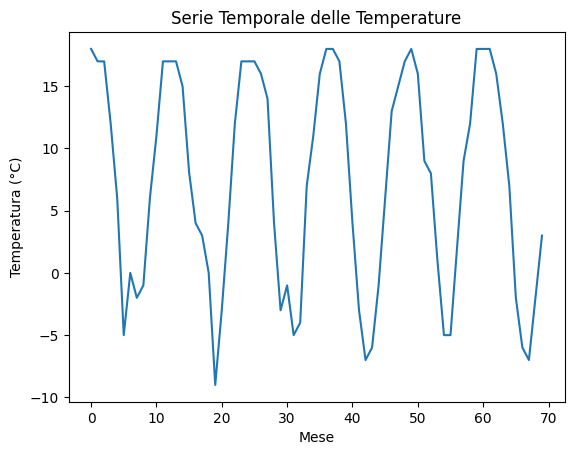

In [13]:
plt.plot(df['temp'])
plt.title('Serie Temporale delle Temperature')
plt.xlabel('Mese')
plt.ylabel('Temperatura (°C)')
plt.show()

A cosa è dovuta la forma di questo grafico?

3. Possiamo notare due colonne che indicano il consumo di gas per ogni mese. Uno indica il totale del mese (`cubicmetres`) e l'altra la media giornaliera (`dailyusage`).
Quale colonna dovremmo includere nella nostra analisi? Quale delle due è più interessante?

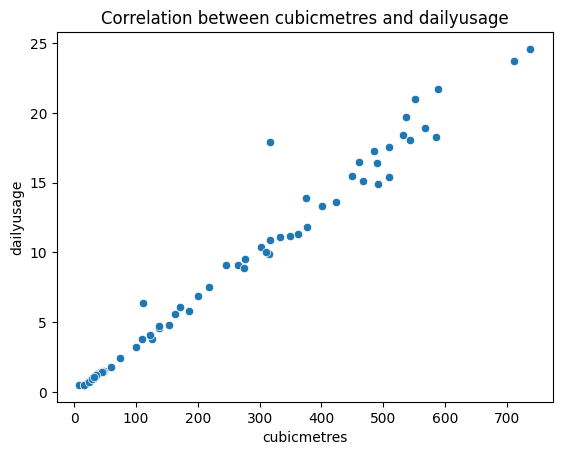

In [20]:
import seaborn as sns
sns.scatterplot(x=df['cubicmetres'], y=df['dailyusage'])
plt.title('Correlation between cubicmetres and dailyusage')
plt.show()

4. Visualizziamo la serie temporale del consumo di gas giornaliero

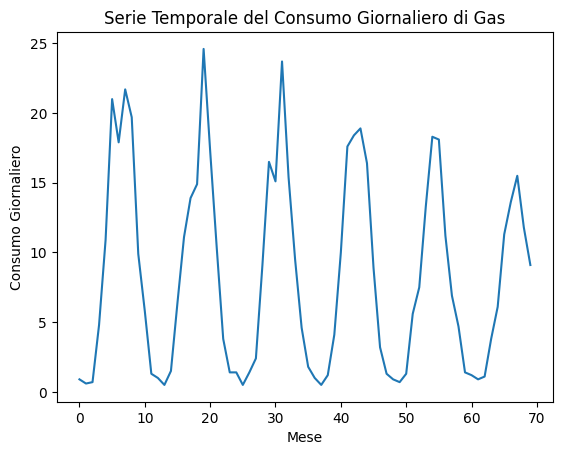

In [22]:
plt.plot(df['dailyusage'])
plt.title('Serie Temporale del Consumo Giornaliero di Gas')
plt.xlabel('Mese')
plt.ylabel('Consumo Giornaliero')
plt.show()

5. Mostriamo in un grafico la temperatura e il consumo giornaliero di gas per ogni osservazione, colorando i punti in base al mese:

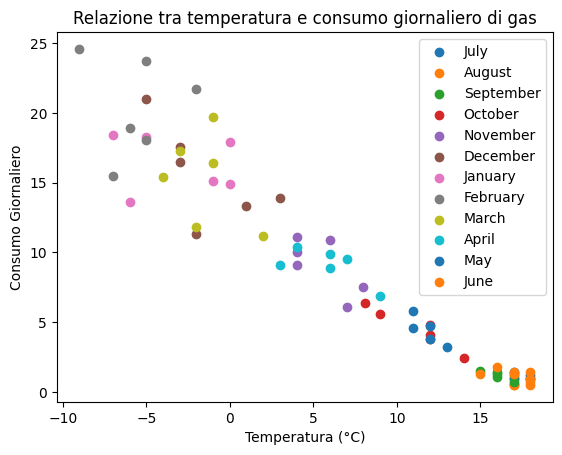

In [23]:
for m in df['month'].unique():
    df_m = df[df['month'] == m]
    plt.scatter(df_m['temp'], df_m['dailyusage'], label=m)
plt.title('Relazione tra temperatura e consumo giornaliero di gas')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Consumo Giornaliero')
plt.legend()
plt.show()

Che tipo di relazione c'è tra le variabili?

6. Aggiungiamo una colonna al dataframe chiamata `efficiency_level` contenente la somma delle colonne `roof_insulation`, `wall_insulation` e `high_efficiency_furnace`

Quali valori può assumere questa nuova colonna?

In [24]:
df['energy_efficiency'] = df['roof_insulation'] + df['wall_insulation'] + df['high_efficiency_furnace']

df['energy_efficiency'].value_counts()

,count
energy_efficiency,
0,40
1,16
2,8
3,6


7. Mostriamo un grafico scatter con la temperatura e il consumo giornaliero di gas, questa volta colorando i punti in base al livello di efficienza energetico:


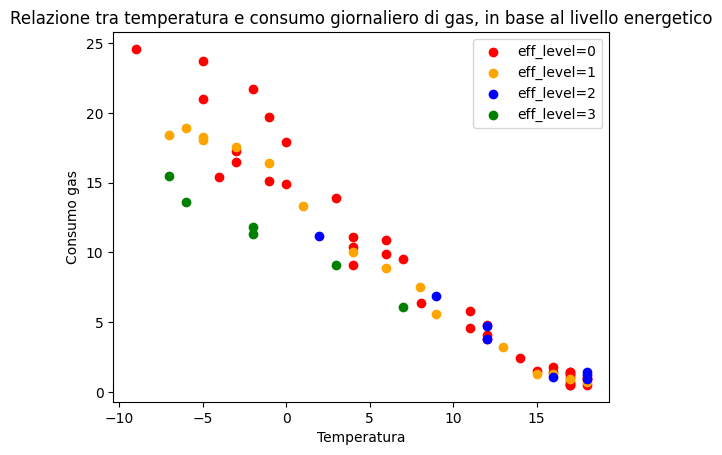

In [25]:
colors = ['red', 'orange', 'blue', 'green']

for i in range(len(colors)):
    df_i = df[df['energy_efficiency'] == i]
    plt.scatter(df_i['temp'], df_i['dailyusage'], label=f'eff_level={i}', color=colors[i])
plt.xlabel('Temperatura')
plt.ylabel('Consumo gas')
plt.title('Relazione tra temperatura e consumo giornaliero di gas, in base al livello energetico')
plt.legend()
plt.show()

8. Addestriamo un modello lineare per predire il consumo giornaliero di gas in base alla temperatura:


In [26]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X=df[['temp']], y=df['dailyusage'])

print(f'Coefficiente angolare: {model.coef_[0]:.2f}')
print(f'Intercetta: {model.intercept_:.2f}')

r_squared = model.score(df[['temp']], df['dailyusage'])
print(f'R^2: {r_squared:.2f}')

Coefficiente angolare: -0.79
Intercetta: 14.21
R^2: 0.93


Cosa possiamo dire di questo modello? Conferma le ipotesi fatte _a priori_?

9. Visualizziamo la retta di regressione insieme ai dati:

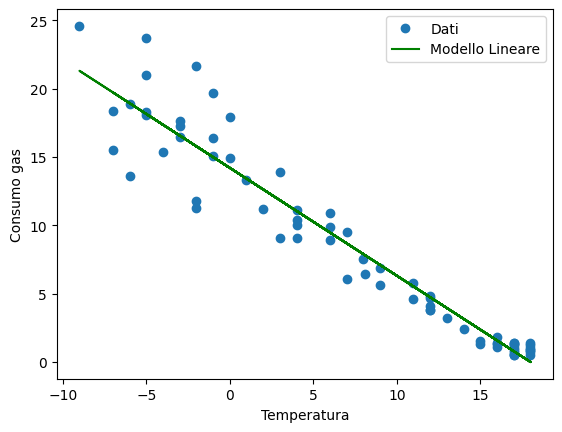

In [28]:
consumo_predetto = model.predict(df[['temp']])

plt.plot(df['temp'], df['dailyusage'], 'o', label='Dati')
plt.plot(df['temp'], consumo_predetto, '-', color='green', label='Modello Lineare')
plt.xlabel('Temperatura')
plt.ylabel('Consumo gas')
plt.legend()
plt.show()

Qualitativamente, il modello è ugualmente preciso per tutti i valori di temperatura? Ci sono zone in cui sembra essere meno preciso?

Vediamo il _grafico dei residui_:

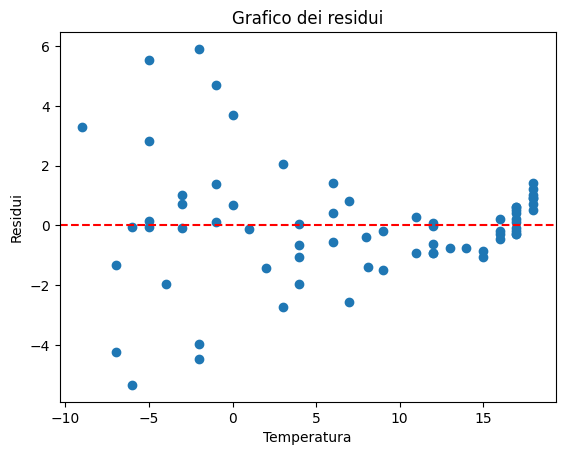

In [29]:
residui = df['dailyusage'] - consumo_predetto

plt.plot(df['temp'], residui, 'o')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Temperatura')
plt.ylabel('Residui')
plt.title('Grafico dei residui')
plt.show()

Conoscendo il dataset, che ipotesi possiamo fare a riguardo?

**Suggerimento**: dobbiamo valutare l'efficacia degli interventi di efficientamento energetico!

10. Creiamo una copia del dataset, ma senza le osservazioni dove la temperatura è maggiore o uguale a 15 gradi:

In [30]:
df_bassa_temperatura = df[df['temp']<15]

11. Addestriamo un modello che predica il consumo giornaliero di gas in base alla temperatura e le informazioni disponibili sugli interventi di efficientamento energetico:


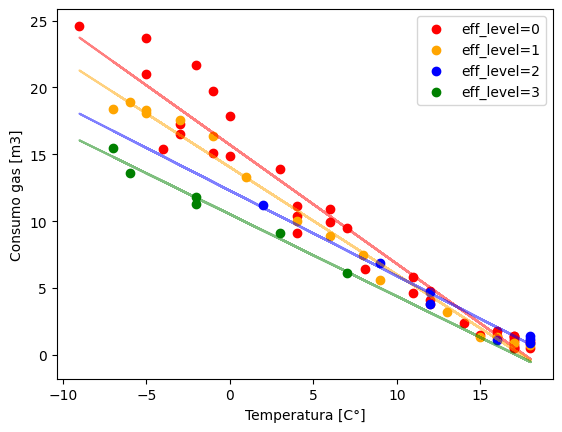

In [41]:
colors = ['red', 'orange', 'blue', 'green']
models = []

for i in range(df['energy_efficiency'].max()+1):
    X = df[df['temp']<15] # bassa temperatura
    X = df[['temp']][df['energy_efficiency']==i].copy()
    y = df['dailyusage'][df['energy_efficiency']==i].copy()
    model = LinearRegression()
    model.fit(X, y)
    plt.scatter(X['temp'], y, label=f'eff_level={i}', color=colors[i])
    plt.plot(df['temp'], model.predict(df[['temp']]), color=colors[i], alpha=0.5)
    models.append(model)


plt.xlabel('Temperatura [C°]')
plt.ylabel('Consumo gas [m3]')
plt.legend()
plt.show()

12. Utilizzando il modello addestrato, scriviamo una funzione che prenda in input un dataframe contenente una colonna `temp` con temperature e restituisca la differenza di consumo senza efficientamento e con efficientamento massimo:

In [42]:
model_no_efficientamento = models[0]
model_max_efficientamento = models[-1]

def differenza_consumo(X):
    return model_no_efficientamento.predict(X[['temp']]) - model_max_efficientamento.predict(X[['temp']])

def consumo_relativo(X):
    return model_max_efficientamento.predict(X[['temp']]) / model_no_efficientamento.predict(X[['temp']])

13. Visualizziamo il consumo stimato in base alla temperatura, sia con efficientamento che senza efficientamento:

In [43]:
X = pd.DataFrame({'temp': range(-10, 15, 1)}) # range di temperature "verosimili"
pred_no_efficientamento = model_no_efficientamento.predict(X)
pred_max_efficientamento = model_max_efficientamento.predict(X)

14. Visualizziamo la differenza di consumo stimata in base alla temperatura:

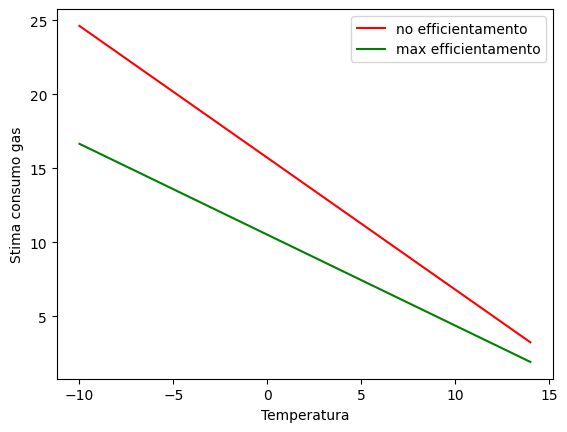

In [44]:
plt.plot(X['temp'], pred_no_efficientamento, color='red', label='no efficientamento')
plt.plot(X['temp'], pred_max_efficientamento, color='green', label='max efficientamento')
plt.xlabel('Temperatura')
plt.ylabel('Stima consumo gas')
plt.legend()
plt.show()

15. Visualizziamo il rapporto tra consumo stimato con efficientamento e consumo stimato senza efficientamento in base alla temperatura:

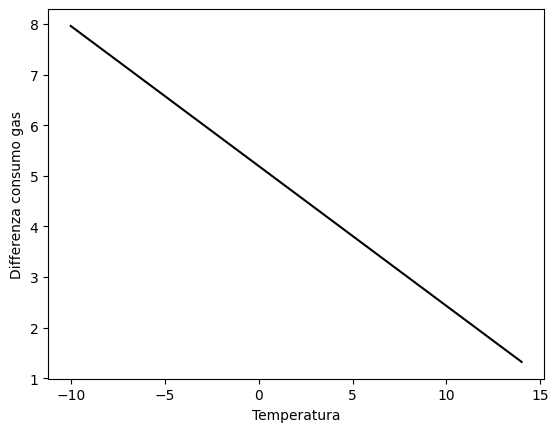

In [45]:
differenza_consumo = differenza_consumo(X)
plt.plot(X['temp'], differenza_consumo, color='black')
plt.xlabel('Temperatura')
plt.ylabel('Differenza consumo gas')
plt.show()

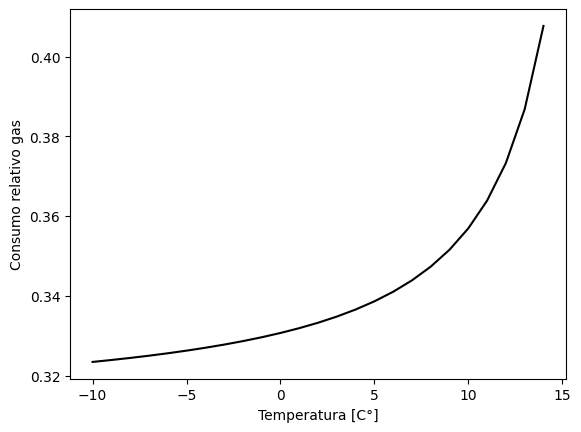

In [47]:
rapporto_consumo = consumo_relativo(X)
plt.plot(X['temp'], 1 - rapporto_consumo, color='black')
plt.xlabel('Temperatura [C°]')
plt.ylabel('Consumo relativo gas')
plt.show()